In [1]:
import numpy as np
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Fix seed
np.random.seed(123)

# Generate a set of 10 nodes in [0,1]^2
intensity = 15 # lambda parameter for Poisson distribution
poisson_var = np.random.poisson(intensity)
nodes = np.random.rand(poisson_var, 2)
grid = 51
stepsize = 1.0/(grid-1)

# Toroidal distance
def toroidal_distance(point1, point2, size):
    diff = np.array([]).reshape(0,2)
    for i in range(3):
        for j in range(3):
            diff = np.vstack([diff, np.abs(point1 + np.array([(i-1)*size, (j-1)*size]) - point2)])
    return np.min(np.linalg.norm(diff, axis=1))

# Define a function that calculates the distance from each point in [0,1]^2 to the closest node of the sampled set
def distance_to_nodes(x, y):
    distances = np.array([]).reshape(0,1)
    for node in nodes:
        distances = np.vstack([distances, toroidal_distance(np.array([x,y]), node, 1)])
    return np.min(distances)

# Evaluate the function at each point in [0,1]^2
x = np.linspace(0, 1, grid)
y = np.linspace(0, 1, grid)
Z = np.zeros((grid, grid))
start = time.time()
for i in range(grid):
    for j in range(grid):
        clear_output(wait=True)
        Z[i,j] = distance_to_nodes(x[i], y[j])
        print("current progress: row",i+1,"/",grid,"and column",j+1,"/",grid)

end = time.time()
print("Elapsed time: " + str(end - start) + " seconds")

current progress: row 51 / 51 and column 51 / 51
Elapsed time: 23.915783405303955 seconds


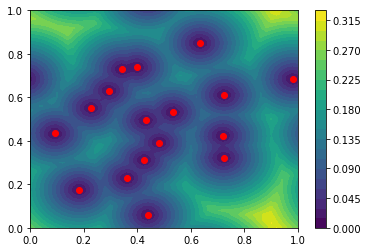

In [2]:
# Plot the function as a contour plot
X,Y = np.meshgrid(x,y)
plt.contourf(Y, X, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.scatter(nodes[:,0], nodes[:,1], c='red', marker='o')
plt.show()

In [3]:
fileContents = ""

for j in range(grid):
    for i in range(grid):
        fileContents = fileContents + "{0:1.4f} {1:1.4f} {2:1.4f}\n".format(x[i], y[j], Z[i,j])
        
#for i in range(len(nodes)):
#    tikz = tikz + "\\fill[red] ({0:1.4f}, {1:1.4f}) circle (0.01);\n".format(nodes[i,0],nodes[i,1])

# Open the output TikZ file
with open('contact_distances.txt', 'w') as f:
    # Write the txt for the plot
    f.write(fileContents)

In [4]:
nodesString = ""

for i in range(len(nodes)-1):
    nodesString = nodesString + "({0:1.4f}, {1:1.4f}, 0) ".format(nodes[i,0], nodes[i,1])
nodesString = nodesString + "({0:1.4f}, {1:1.4f}, 0)".format(nodes[len(nodes)-1,0], nodes[len(nodes)-1,1])
print(nodesString)

(0.2269, 0.5513, 0) (0.7195, 0.4231, 0) (0.9808, 0.6848, 0) (0.4809, 0.3921, 0) (0.3432, 0.7290, 0) (0.4386, 0.0597, 0) (0.3980, 0.7380, 0) (0.1825, 0.1755, 0) (0.5316, 0.5318, 0) (0.6344, 0.8494, 0) (0.7245, 0.6110, 0) (0.7224, 0.3230, 0) (0.3618, 0.2283, 0) (0.2937, 0.6310, 0) (0.0921, 0.4337, 0) (0.4309, 0.4937, 0) (0.4258, 0.3123, 0)
